In [42]:
import scipy
import numpy
import matplotlib
import numpy as np
import os
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
get_ipython().magic(u'matplotlib inline')

from __future__ import division

In [43]:
exp1 = np.fromfile("D://temper.dat",dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (-1,3))
a = exp1.transpose()
exp2 = np.fromfile("D://volt.dat",dtype=float,count=-1, sep=" ")
exp2 = np.reshape(exp2, (-1,2))
aa = exp2.transpose()

In [44]:
#aa.shape
xx=np.linspace(0, 500, num=1000)

In [45]:
def csch(x):
    return 2/(np.exp(x)-np.exp(-x))


In [46]:
data.shape

(7L,)

In [47]:
finy=np.linspace(0, 0, num=10)
finx=np.linspace(0, 0, num=10)
for i in xrange(10):
    finy[i]=aa[1,19-i]
    finx[i]=aa[0,19-i]
finy=(finy[0:10]+aa[1,0:10])/2

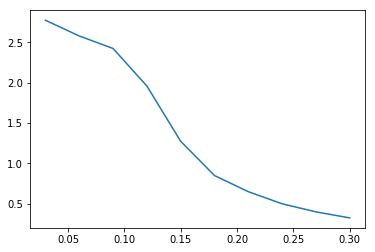

In [48]:
plt.plot(finx,finy)
xxx=np.linspace(0, 0.4, num=1000)
xx=np.linspace(0, 800, num=1000)


Parameters([('a', <Parameter 'a', value=17.68611841721971 +/- 0.812, bounds=[0:inf]>), ('bb', <Parameter 'bb', value=0.53102440254763994 +/- 0.0667, bounds=[0.1:1.1]>), ('c', <Parameter 'c', value=0.024099677271887332 +/- 0.00287, bounds=[0:inf]>)])


C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in multiply
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in multiply


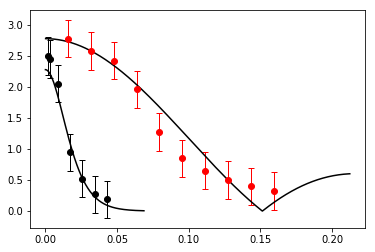

In [49]:
#### Ballistic
#!/usr/bin/env python
#<examples/doc_basic.py>
x=a[0]
data=a[1]
c=0.1

c1=np.linspace(0, 0, num=10)
c2=np.linspace(0, 0, num=10)
c3=np.linspace(0, 0, num=10)
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
#b=0.05
# create data to be fitted

def fcn2min(params, x, data):
    a = params['a']
    b = params['b']
    c = params['c']
    res=a*(8.6E-5*x/(b))*csch(8.6E-5*np.pi*x/(c))*np.sin(b/(2*c))     
    return res - data
#bb=1
vol=0.1
tem=25
x1=a[0]
x2=finx
y1=a[1]
y2=finy
#co2=bb
def residual_two_functions(params, x1,x2, y1, y2):
    a = params['a']
    bb = params['bb']
    c = params['c']
    res=a*(8.6E-5*x1/(vol*bb))*csch(8.6E-5*np.pi*x1/(c))*np.sin(vol*bb/(2*c))     
    res2=a*(8.6E-5*tem/(x2*bb))*csch(8.6E-5*np.pi*tem/(c))*np.sin(x2*bb/(2*c))
    diff1 = y1 - res
    diff2 = y2 - res2
    return np.concatenate((diff1, diff2))
    
# create a set of Parameters
params = Parameters()
params.add('a',   value= 1,min=0)
params.add('bb', value=0.5, min=0.1,max=1.1)
params.add('c', value= 40E-3, min=0)       

# do fit, here with leastsq model
minner = Minimizer(residual_two_functions, params, fcn_args=(x1,x2,y1,y2))
kws  = {'options': {'maxiter':100}}
result = minner.minimize()
result.params

# calculate final result
final = np.concatenate((y1,y2)) + result.residual
#    new_matrix[i,:]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results

#plt.plot(np.concatenate((8.6E-5*x1,x2)), final, 'r')
#plt.xlim(-1.4,-1.2)
params2=result.params
print params2
v = params2.valuesdict()
vis2=v['a']
co2=v['bb']
ec2=v['c']
plt.errorbar(finx*co2,finy ,  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)

#######
#plt.semilogy(xx*8.6E-5,nu*(8.6E-5*xx/(b))*csch(8.6E-5*xx/(ec))*np.sin(b/(2*ec)),'k')
#Points temperature
plt.errorbar(a[0]*8.6E-5, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.plot(xxx*co2,vis2*(8.6E-5*tem/(xxx*co2))*csch(8.6E-5*np.pi*tem/(ec2))*np.abs(np.sin(xxx*co2/(2*ec2))),'-k')
#Fit temperature
#b=np.linspace(0.01,10, num=100)
#for i in xrange(100):
plt.plot(xx*8.6E-5,vis2*(8.6E-5*xx/(vol*co2))*csch(8.6E-5*xx*np.pi/(ec2))*np.abs(np.sin(vol*co2/(2*ec2))),'k')
plt.savefig('D:\\painintheass1.pdf', format='pdf')


Parameters([('a', <Parameter 'a', value=0.17507477712768726 +/- 0.0101, bounds=[0:100]>), ('bb', <Parameter 'bb', value=0.10849044085444227 +/- 0.00778, bounds=[0.1:1]>), ('c', <Parameter 'c', value=40728.389757174191 +/- 4.47e+03, bounds=[0:10000000]>)])


NameError: name 'dd' is not defined

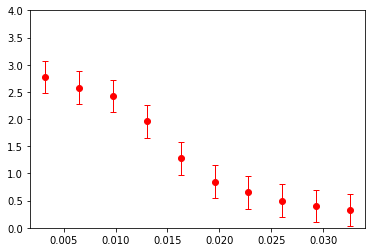

In [50]:
#### Diffusive
#!/usr/bin/env python
#<examples/doc_basic.py>
x=a[0]
data=a[1]
c=0.1

c1=np.linspace(0, 0, num=10)
c2=np.linspace(0, 0, num=10)
c3=np.linspace(0, 0, num=10)
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
#b=0.05
# create data to be fitted

def fcn2min(params, x, data):
    a = params['a']
    b = params['b']
    c = params['c']
    res=a**csch(8.6E-5*np.pi*x/(c))*np.sin(b/(2*c))     
    return res - data
bb=1
vol=0.1
tem=25
x1=a[0]
x2=finx
y1=a[1]
y2=finy
co2=bb
def residual_two_functions(params, x1,x2, y1, y2):
    a = params['a']
    bb = params['bb']
    c = params['c']
#    d = params['d']
    res=a*np.power((vol*bb)/8.6E-5*x1,1/2)*np.exp(-np.power(c*(8.6E-5*x1+vol*bb)**2/3,1/2))     
    res2=a*np.power((x2*bb)/8.6E-5*tem,1/2)*np.exp(-np.power(c*(8.6E-5*tem+x2*bb)**2/3,1/2))    
    diff1 = y1 - res
    diff2 = y2 - res2
    return np.concatenate((diff1, diff2))
    
# create a set of Parameters
params = Parameters()
params.add('a',   value= 10,min=0,max=100)
params.add('bb', value=0.5, min=0.1,max=1)
params.add('c', value=1000, min=0,max=10000000)       
#params.add('d', value=10000, min=8000,max=100000)     

# do fit, here with leastsq model
minner = Minimizer(residual_two_functions, params, fcn_args=(x1,x2,y1,y2))
kws  = {'options': {'maxiter':100}}
result = minner.minimize()
result.params

# calculate final result
final = np.concatenate((y1,y2)) + result.residual
#    new_matrix[i,:]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results

#plt.plot(np.concatenate((8.6E-5*x1,x2)), final, 'r')
#plt.xlim(-1.4,-1.2)
params2=result.params
print params2
v = params2.valuesdict()
vis2=v['a']
co2=v['bb']
cc=v['c']
#dd=v['d']

plt.ylim(0,4)
plt.errorbar(finx*co2,finy ,  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)
plt.plot(xxx*co2,vis2*np.power((xxx*bb)/8.6E-5*tem,1/2)*np.exp(-np.power(cc*(8.6E-5*tem)**2/3+dd*(xxx*bb)**2/3,1/2)) ,'-r')
plt.errorbar(a[0]*8.6E-5, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.plot(xx*8.6E-5,vis2*np.power((vol*bb)/(8.6E-5*xx),1/2)*np.exp(-np.power(cc*(8.6E-5*xx)**2/3+dd*(vol*bb)**2/3,1/2)),'-k')

plt.ylim(0,3)
plt.savefig('D:\\painintheass1.pdf', format='pdf')


In [51]:
vis2

0.17507477712768726

C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


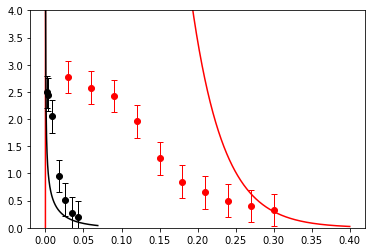

In [52]:
co2=1
vis2=3
dd=5000
cc=2100
plt.ylim(0,4)
plt.errorbar(finx*co2,finy ,  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)
plt.plot(xxx*co2,vis2*np.power((xxx*bb)/8.6E-5*tem,1/2)*np.exp(-np.power(cc*(8.6E-5*tem+xxx*bb)**2/3,1/2)) ,'-r')
plt.errorbar(a[0]*8.6E-5, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.plot(xx*8.6E-5,vis2*np.power((vol*bb)/(8.6E-5*xx),1/2)*np.exp(-np.power(cc*(8.6E-5*xx+vol*bb)**2/3,1/2)),'-k')

In [53]:
vis2

3

Parameters([('a', <Parameter 'a', value=16.184506607094882 +/- 1.09e+07, bounds=[0:inf]>), ('bb', <Parameter 'bb', value=0.11859306321242416 +/- 3.3e+06, bounds=[0.1:1.1]>), ('c', <Parameter 'c', value=0.022003785406671916 +/- 0.00111, bounds=[0:inf]>)])


C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in multiply
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in power


ValueError: operands could not be broadcast together with shapes (2,20) (1000,) 

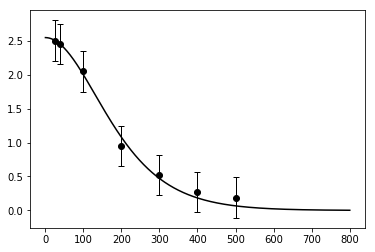

In [54]:
#!/usr/bin/env python
#<examples/doc_basic.py>
x=a[0]
data=a[1]
#c=0.1

c1=np.linspace(0, 0, num=10)
c2=np.linspace(0, 0, num=10)
c3=np.linspace(0, 0, num=10)
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
b=0.05
# create data to be fitted

def fcn2min(params, x, data):
    a = params['a']
    #b = params['b']
    c = params['c']
    res=a*(8.6E-5*x/(b))*csch(8.6E-5*np.pi*x/(c))*np.sin(b/(2*c))     
    return res - data
bb=1
vol=0.1
tem=25
x1=a[0]
x2=finx
y1=a[1]
y2=finy

def residual_two_functions(params, x1,x2, y1, y2):
    a = params['a']
    bb = params['bb']
    c = params['c']
    res=a*(8.6E-5*x1/(vol*bb))*csch(8.6E-5*np.pi*x1/(c))*np.sin(vol*bb/(2*c))     
    res2=y2
    diff1 = y1 - res
    diff2 = y2 - res2
    return diff1
    
# create a set of Parameters
params = Parameters()
params.add('a',   value= 1,min=0)
params.add('bb', value=1, min=0.1,max=1.1)
params.add('c', value= 40E-3, min=0)       

# do fit, here with leastsq model
minner = Minimizer(residual_two_functions, params, fcn_args=(x1,x2,y1,y2))
kws  = {'options': {'maxiter':100}}
result = minner.minimize()
result.params

# calculate final result
final = y1 + result.residual
#    new_matrix[i,:]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results

#plt.plot(np.concatenate((8.6E-5*x1,x2)), final, 'r')
#plt.xlim(-1.4,-1.2)
params2=result.params
print params2
v = params2.valuesdict()
vis=v['a']
co=v['bb']
ec=v['c']
#plt.errorbar(finx*co,finy ,  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)

#######
#plt.semilogy(xx*8.6E-5,nu*(8.6E-5*xx/(b))*csch(8.6E-5*xx/(ec))*np.sin(b/(2*ec)),'k')
#Points temperature
plt.errorbar(a[0], a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#plt.plot(xxx*co,vis*(8.6E-5*tem/(xxx*co))*csch(8.6E-5*np.pi*tem/(ec))*np.abs(np.sin(xxx*co/(2*ec))),'-k')
#Fit temperature
#b=np.linspace(0.01,10, num=100)
#for i in xrange(100):
plt.plot(xx,vis*(8.6E-5*xx/(vol*co))*csch(8.6E-5*xx*np.pi/(ec))*np.abs(np.sin(vol*co/(2*ec))),'k')

plt.plot(xx,aa/5*np.power(8.6E-5*xx,-1/2),'k--')
plt.ylim(0,3)


plt.ylim(0,3)
plt.xlim(0,550)
plt.ylabel("$\\nu$ ($\\%$)", color='k',fontsize=12)
plt.xlabel("$T$ (mK)", color='k',fontsize=12)
plt.tick_params(direction='in')
plt.savefig('D:\\temp_final.pdf',bbox_inches='tight', format='pdf',dpi=900)
#plt.savefig('D:\\stefan1.pdf', format='pdf')

C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


ValueError: operands could not be broadcast together with shapes (2,20) (1000,) 

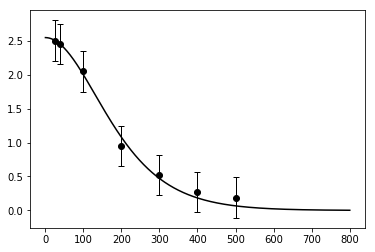

In [55]:
#Points temperature

plt.plot(xx,vis*(8.6E-5*xx/(vol*co))*csch(8.6E-5*xx*np.pi/(ec))*np.abs(np.sin(vol*co/(2*ec))),'k')
plt.errorbar(a[0], a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.plot(xx,aa/5*np.power(8.6E-5*xx,-1/2),'k--')
plt.ylim(0,3)


plt.ylim(0,3)
plt.xlim(0,550)
plt.ylabel("$\\nu$ ($\\%$)", color='k',fontsize=12)
plt.xlabel("$T$ (mK)", color='k',fontsize=12)
plt.tick_params(direction='in')

tratata = plt.axes([.51, .5, .3, .3], facecolor='w')
s=35000
b=-2
plt.errorbar(a[0], a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.loglog(xx,s*np.power(xx,b),'grey')
plt.ylim(0.05,7)
plt.xlim(10,700)
plt.ylabel("$\\nu$ ($\\%$)", color='k',fontsize=12)
plt.xlabel("$T$ (mK)", color='k',fontsize=12)
plt.tick_params(direction='in')
plt.savefig('D:\\stefan1.pdf', format='pdf')

Parameters([('aa', <Parameter 'aa', value=0.12792035150141534 +/- 0.0908, bounds=[0:inf]>), ('c', <Parameter 'c', value=5.9967979026964713e-07 +/- 0.954, bounds=[0:inf]>), ('d', <Parameter 'd', value=0.036626542913303473 +/- 5.35e+06, bounds=[0:inf]>)])


C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in power


(0, 0.05)

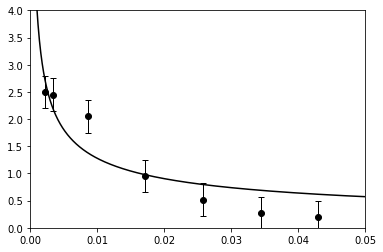

In [56]:
#Diffusive#

#!/usr/bin/env python
#<examples/doc_basic.py>
x=a[0]
data=a[1]
c=0.1

c1=np.linspace(0, 0, num=10)
c2=np.linspace(0, 0, num=10)
c3=np.linspace(0, 0, num=10)
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
b=0.05
# create data to be fitted


bb=1
vol=0.1
tem=25
x1=a[0]
x2=finx
y1=a[1]
y2=finy
#d=1/3
def residual_two_functions(params, x1, y1):
    aa = params['aa']
    #bb = params['bb']
    c = params['c']
    d = params['d']
    res=aa*np.power(8.6E-5*x1,-1/2)*np.exp((-c)*x1**(-d))    
    #res2=a*(8.6E-5*tem/(x2*bb))*csch(8.6E-5*np.pi*tem/(c))*np.sin(x2*bb/(2*c))
    diff1 = y1 - res
    
    #diff2 = y2 - res2
    return diff1
    
# create a set of Parameters
params = Parameters()
params.add('aa',   value= 0.2,min=0)
#params.add('bb', value=1, min=0.1,max=1.1)
params.add('c', value= 0.6,min=0)
params.add('d', value= 0.2,min=0)

# do fit, here with leastsq model
minner = Minimizer(residual_two_functions, params, fcn_args=(x1,y1))
kws  = {'options': {'maxiter':100}}
result = minner.minimize()
result.params

# calculate final result
final = y1 + result.residual
#    new_matrix[i,:]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results

#plt.plot(np.concatenate((8.6E-5*x1,x2)), final, 'r')
#plt.xlim(-1.4,-1.2)
params2=result.params
print params2
v = params2.valuesdict()
vis0=v['aa']
#co=v['bb']
c=v['c']
#d=v['d']
#plt.errorbar(finx*co,finy ,  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)

#######
#plt.semilogy(xx*8.6E-5,nu*(8.6E-5*xx/(b))*csch(8.6E-5*xx/(ec))*np.sin(b/(2*ec)),'k')
#Points temperature
plt.errorbar(a[0]*8.6E-5, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#plt.plot(xxx*co,vis*(8.6E-5*tem/(xxx*co))*csch(8.6E-5*np.pi*tem/(ec))*np.abs(np.sin(xxx*co/(2*ec))),'-r')
#Fit temperature
#b=np.linspace(0.01,10, num=100)
#for i in xrange(100):
plt.plot(xx*8.6E-5,vis0*np.power(8.6E-5*xx,-1/2)*np.exp((-c)*xx**(-d))    ,'k')
plt.ylim(0,4)
plt.xlim(0,0.05)
#plt.savefig('D:\\stefan1.pdf', format='pdf')

C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


(0, 3)

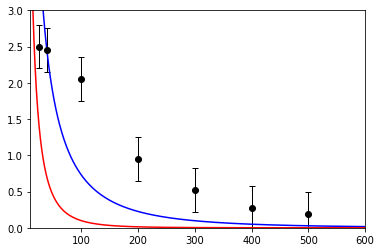

In [57]:
#
aa=0.5
c=-0.1
d=-0.5
lin0=1
lin=lin0
ls=1
plt.errorbar(a[0], a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#plt.plot(xx,aa*np.power(8.6E-5*xx,-1/2)*np.exp(c/xx**d),'k' )
plt.plot(xx,aa*np.power(8.6E-5*xx,-1/2)*np.exp(c/xx**d*2),'b' )
plt.plot(xx,aa*np.power(8.6E-5*xx,-1/2)*np.exp(c/xx**d*4),'r' )

plt.xlim(10,600)
plt.ylim(0,3)

In [58]:
a[0]

array([  25.,   40.,  100.,  200.,  300.,  400.,  500.])

C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


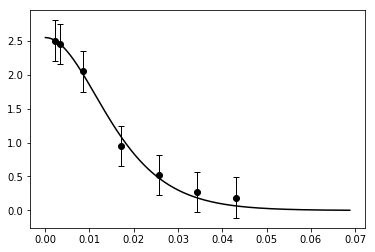

In [59]:
plt.errorbar(a[0]*8.6E-5, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.plot(xx*8.6E-5,vis*(8.6E-5*xx/(vol*co))*csch(8.6E-5*xx*np.pi/(ec))*np.abs(np.sin(vol*co/(2*ec))),'k')

In [60]:
result

In [61]:
 result.residual.shape

(7L,)

In [62]:
result.params

Parameters([('aa',
             <Parameter 'aa', value=0.12792035150141534 +/- 0.0908, bounds=[0:inf]>),
            ('c',
             <Parameter 'c', value=5.9967979026964713e-07 +/- 0.954, bounds=[0:inf]>),
            ('d',
             <Parameter 'd', value=0.036626542913303473 +/- 5.35e+06, bounds=[0:inf]>)])

In [63]:
#!/usr/bin/env python
#<examples/doc_basic.py>
x=aa[0]
data=aa[1]


v1=np.linspace(0, 0, num=20)
v2=np.linspace(0, 0, num=20)
v3=np.linspace(0, 0, num=20)
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
b=25
# create data to be fitted
for i in range(0,20):
    def fcn2min(params, x, data):
        a = params['a']
        #b = params['b']
        c = params['c']
        res=a*(8.6E-5*b/(x))*csch(8.6E-5*np.pi*b/(c))*np.sin(x/(2*c))
        return res - data
    
# create a set of Parameters
    params = Parameters()
    params.add('a',   value= 1)
    #params.add('b', value=0.1)
    params.add('c', value= 1E-2)       

# do fit, here with leastsq model
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

# calculate final result
    final = data + result.residual
#    new_matrix[i,:]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results
    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')
    #plt.xlim(-1.4,-1.2)
    params2=result.params
    v = params2.valuesdict()
    v1[i]=v['a']
    #v2[i]=v['b']
    v3[i]=v['c']
#plt.savefig('D:\\sl2.pdf', format='pdf')

TypeError: 'float' object has no attribute '__getitem__'

In [64]:
params2

Parameters([('aa',
             <Parameter 'aa', value=0.12792035150141534 +/- 0.0908, bounds=[0:inf]>),
            ('c',
             <Parameter 'c', value=5.9967979026964713e-07 +/- 0.954, bounds=[0:inf]>),
            ('d',
             <Parameter 'd', value=0.036626542913303473 +/- 5.35e+06, bounds=[0:inf]>)])

In [65]:
#!/usr/bin/env python
#<examples/doc_basic.py>
x=aa[0]/10
data=aa[1]


v11=np.linspace(0, 0, num=20)
v22=np.linspace(0, 0, num=20)
v33=np.linspace(0, 0, num=20)
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
# create data to be fitted
for i in range(0,20):
    def fcn2min(params, x, data):
        a = params['a']
        b = params['b']
        c = params['c']
        res=a*np.exp(b*np.power(x,1/2))
        return res - data
    
# create a set of Parameters
    params = Parameters()
    params.add('a',   value= 1)
    params.add('b', value=0.1)
    params.add('c', value= 1E-2)       

# do fit, here with leastsq model
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

# calculate final result
    final = data + result.residual
#    new_matrix[i,:]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results
    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')
    #plt.xlim(-1.4,-1.2)
    params2=result.params
    v = params2.valuesdict()
    v11[i]=v['a']
    v22[i]=v['b']
    v33[i]=v['c']
#plt.savefig('D:\\sl2.pdf', format='pdf')

TypeError: 'float' object has no attribute '__getitem__'

In [66]:
result.residual

array([-0.25880068,  0.26897656,  0.67059966, -0.02538334, -0.27639716,
       -0.41970017, -0.42688659])

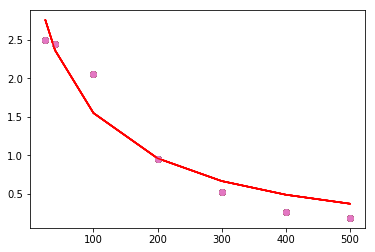

In [67]:
#!/usr/bin/env python
#<examples/doc_basic.py>
x=a[0]
data=a[1]
c11=np.linspace(0, 0, num=7)
c22=np.linspace(0, 0, num=7)
c33=np.linspace(0, 0, num=7)
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
# create data to be fitted
for i in range(0,7):
    def fcn2min(params, x, data):
        a = params['a']
        b = params['b']
        c = params['c']
        res=a*np.exp(b*np.power(x,1/2))
        return res - data
    
# create a set of Parameters
    params = Parameters()
    params.add('a',   value= 1)
    params.add('b', value=0.1)
    params.add('c', value= 1E-2)       

# do fit, here with leastsq model
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

# calculate final result
    final = data + result.residual
#    new_matrix[i,:]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results
    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')
    #plt.xlim(-1.4,-1.2)
    params2=result.params
    v = params2.valuesdict()
    c11[i]=v['a']
    c22[i]=v['b']
    c33[i]=v['c']
#plt.savefig('D:\\sl2.pdf', format='pdf')

In [68]:
c11[0]

4.8880435423860593

C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


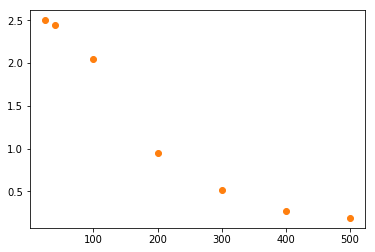

In [69]:
xx=np.linspace(0, 500, num=1000)
nu=c1[0]
ec=c3[0]
b=c2[0]
plt.plot(xx,nu*(8.6E-5*xx/(b))*csch(8.6E-5*xx/(ec))*np.sin(b/(2*ec)))
plt.plot(x,data,'o')

C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sin
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in absolute
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in power
C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\platonov\Anaconda3\envs\py27

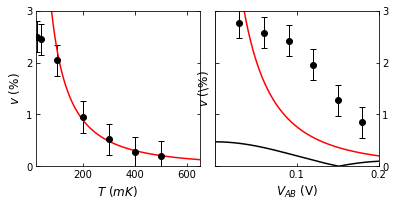

In [78]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
gs = gridspec.GridSpec(4,5)
xx=np.linspace(0, 800, num=1000)
gs.update(left=0, right=1, wspace=0.2, hspace=1)

ax1 = plt.subplot(gs[0:3, 0:2])
red_patch = mlines.Line2D([], [], color='red', marker='o',
                          markersize=4, label='$V_t=-3\,$V')
blue_patch = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=4,label='$-2.5\,$V')
black_patch = mlines.Line2D([], [], color='black', marker='o',
                          markersize=4,label='$-2\,$V')
#leg=plt.legend(handles=[red_patch,blue_patch,black_patch],loc=2,fontsize=10)
#leg.get_frame().set_facecolor('none')
#leg.get_frame().set_linewidth(0.0)
#x1=np.linspace(300, -260, num=28)
#x2=np.linspace(400, -120, num=28)
#x3=np.linspace(400, -100, num=27)
plt.errorbar(a[0], a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.plot(xx,vis*(8.6E-5*xx/(vol*co))*csch(8.6E-5*xx*np.pi/(ec))*np.abs(np.sin(vol*co/(2*ec))),'k')
#plt.ylim(0,3)
plt.tick_params(direction='in', labeltop=False, labelbottom=True, bottom=True,labelleft=True, top=True,left=True, labelright=False, right=True)
plt.yticks([0,1,2,3],fontsize=10)
#plt.plot(x3[1:26],(-1/m4[1:26]/0.05),'-or')
plt.ylim(0,3)
plt.xlim(20,650)



plt.ylabel("$v$ ($\\%$)", color='k',fontsize=12)
plt.xlabel("$T$ ($mK$)", color='k',fontsize=12)
plt.tick_params(direction='in')
#plt.yticks([1,2,3],fontsize=10)
#plt.plot(-exp1[:,100]*1E6,x1,'-k')
#plt.plot(-exp1[:,60]*1E6,x1,'-b')
xx2=np.linspace(0, 2000, num=1000)
coef2=20
test2=11
coef=20
aa=0.5
test=20
lmb=1E9
def length(x):
    res=np.power(8.6E-5*x,-1/3)
    #*lmb/(np.power(8.6E-5*xx,-1/3)+lmb)
    return res
#plt.yticks([0,1,2],fontsize=10)
#plt.xlabel("$I$ ($\mu$A)", color='k',fontsize=12)
#plt.ylabel("$I$ (nA)", color='k',fontsize=12)
#plt.ylim(0,2)
#plt.plot(xx,coef*aa/5*np.power(8.6E-5*xx,-1/2)*np.exp(-np.power(8.6E-5*xx,1/2)*test),'r--')
plt.plot(xx,coef2*aa/5*np.power(8.6E-5*xx,-1/2)*np.exp(-test2/np.power(8.6E-5*xx,-1/3)),'r')
ax2 = plt.subplot(gs[0:3, 2:4])
#plt.plot(xx2,coef2*aa/5*np.power(8.6E-5*xx2,-1/2)*np.exp(-np.power(8.6E-5*xx,1/2),'r--')
plt.tick_params(direction='in', labeltop=False, labelbottom=True, bottom=True,left=True,labelleft=False, top=True,labelright=True, right=True)
xxx=np.linspace(0, 0.4, num=1000)
plt.errorbar(finx*co2,finy ,  yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.plot(xxx*co2,vis2*(8.6E-5*tem/(xxx*co2))*csch(8.6E-5*np.pi*tem/(ec2))*np.abs(np.sin(xxx*co2/(2*ec2))),'-k')
plt.plot(xxx*co2,first/5*np.power(xxx*co2,1/2)*np.exp(-second/np.power(xxx*co2,-1/3)),'r')
#plt.tick_params(direction='in', labeltop=False, labelbottom=True, bottom=True,left=True,labelleft=False, top=True,labelright=True, right=True)
#xxx=np.linspace(0, 0.4, num=1000)
#xx=np.linspace(0, 800, num=1000)
#plt.errorbar(finx*co2,finy ,  yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#plt.loglog(xxx*co2,vis2*(8.6E-5*tem/(xxx*co2))*csch(8.6E-5*np.pi*tem/(ec2))*np.abs(np.sin(xxx*co2/(2*ec2))),'-k')
plt.ylim(0,3)
plt.xlim(0,0.15)
plt.yticks([0,1,2,3],fontsize=10)
plt.xticks([0.1,0.2],fontsize=10)
#plt.ylabel("$\\nu$ ($\\%$)", color='k',fontsize=12)
#plt.xlabel("$V$ (mV)", color='k',fontsize=12)
#red_patch = mlines.Line2D([], [], color='red', marker='o',
#                          markersize=4, label='$V_t=-3\,$V')
#blue_patch = mlines.Line2D([], [], color='blue', marker='o',
#                          markersize=4,label='$-2.5\,$V')
#black_patch = mlines.Line2D([], [], color='black', marker='o',
#                          markersize=4,label='$-2\,$V')
#leg=plt.legend(handles=[red_patch,blue_patch,black_patch],loc=2,fontsize=10)
#leg.get_frame().set_facecolor('none')
#leg.get_frame().set_linewidth(0.0)


#a = plt.axes([.61, .4, .15, .2], facecolor='w')
#x4=np.linspace(300, -260, num=27)

plt.xlabel("$V_{AB}$ (V)", color='k',fontsize=12)
plt.ylabel("$v$ (\%)", color='k',fontsize=12)
#plt.title("$V_s$ (mV)", color='k',fontsize=10)

plt.savefig('D:\\coh.pdf',bbox_inches='tight', format='pdf',dpi=900)

In [77]:
coef2*aa/5

2.0

In [32]:
plt.plot(xx,vis*(8.6E-5*xx/(vol*co))*csch(8.6E-5*xx*np.pi/(ec))*np.abs(np.sin(vol*co/(2*ec))),'k')

NameError: name 'vis' is not defined

In [33]:
vis2

0.17507477712768726

C:\Users\platonov\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


<Container object of 3 artists>

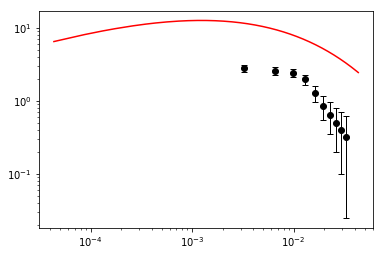

In [34]:
first=8000
second=14

plt.loglog(xxx*co2,first/5*np.power(xxx*co2,1/2)*np.exp(-second/np.power(xxx*co2,-1/3)),'r')
plt.errorbar(finx*co2,finy ,  yerr=0.3,fmt='ko',capsize=3, elinewidth=1)

NameError: name 'coef2' is not defined

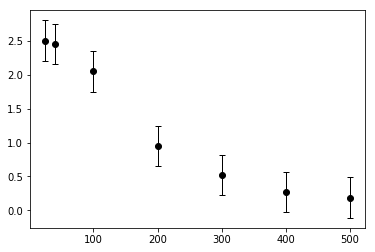

In [35]:
plt.errorbar(a[0], a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.loglog(xx,coef2*aa/5*np.power(8.6E-5*xx,-1/2))
plt.loglog(xx,coef2*aa/5*np.power(8.6E-5*xx,-1/2)*np.exp(-test2/np.power(8.6E-5*xx,-1/3)),'r')
plt.loglog(np.exp(-test2/np.power(8.6E-5*xx,-1/3)))

In [ ]:
ec2

In [ ]:
#Scale factor
k1=1
k2=1
#Shift
d=0.005
#Points voltage
#plt.errorbar(aa[0,0:9]/k1, aa[1,0:9],  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)
#plt.errorbar(aa[0,10:19]/k1+d, aa[1,10:19],yerr=0.3,fmt='bo',capsize=3, elinewidth=1)
plt.errorbar(finx/k1,finy ,  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)
#######
#plt.semilogy(xx*8.6E-5,nu*(8.6E-5*xx/(b))*csch(8.6E-5*xx/(ec))*np.sin(b/(2*ec)),'k')
#Points temperature
#plt.errorbar(a[0]*8.6E-5/k2, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#######
#visibility
v1[0]=16.9
#temperature
v2[0]=25
#######
ec=0.04
########
#voltage
b=0.1/k1
#Fiе voltage (1/10)
plt.plot(xxx/k1,v1[0]*(8.6E-5*v2[0]/(xxx/k1))*csch(8.6E-5*np.pi*v2[0]/(ec))*np.abs(np.sin(xxx/k1/(2*ec))),'--k')
#Fit temperature
#b=np.linspace(0.01,10, num=100)
#for i in xrange(100):
#plt.plot(xx*8.6E-5/k2,v1[0]*(8.6E-5*xx/k2/(b))*csch(8.6E-5*xx*np.pi/k2/(ec))*np.abs(np.sin(b/(2*ec))),'k')
plt.xlim(0,0.4)
plt.ylim(0,3.2)
plt.ylabel("$\\nu$ ($\\%$)", color='k',fontsize=12)
plt.xlabel("$T$ (mK)", color='k',fontsize=12)
plt.tick_params(direction='in')
plt.savefig('D:\\stefan1.pdf',bbox_inches='tight', format='pdf',dpi=900)

In [36]:
plt.errorbar(a[0]*8.6E-5/k2, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)

NameError: name 'k2' is not defined

In [37]:
#Ergodic

#Scale factor
k1=co
k2=1
#Shift
d=0.005
#Points voltage
#plt.errorbar(aa[0,0:9]/k1, aa[1,0:9],  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)
#plt.errorbar(aa[0,10:19]/k1+d, aa[1,10:19],yerr=0.3,fmt='bo',capsize=3, elinewidth=1)
#plt.errorbar(finx*co,finy ,  yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#######
#plt.semilogy(xx*8.6E-5,nu*(8.6E-5*xx/(b))*csch(8.6E-5*xx/(ec))*np.sin(b/(2*ec)),'k')
#Points temperature
plt.errorbar(a[0]*8.6E-5/k2, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#######
#visibility
amp=1.4E4
#temperature
temp0=50
#######
volt=-10
########
temp=-10*np.power(8.6E-5,1/2)
########
#voltage
volt0=0.1
#Fiе voltage (1/10)
#plt.semilogy(xxx/k1,amp*np.exp(volt/k1*np.power(xxx/k1,1/2)+temp*np.power(temp0,1/2)),'k--')
#Fit temperature
#b=np.linspace(0.01,10, num=100)
#for i in xrange(100):
plt.semilogy(xx*8.6E-5,amp*np.exp(volt/k1*np.power(volt0/k1,1/2)+temp*np.power(xx,1/2)),'k-')
#plt.xlim(0.001,6E-2)
#plt.ylim(0.1,10)
plt.savefig('D:\\stefan4.pdf',bbox_inches='tight', format='pdf',dpi=900)

NameError: name 'co' is not defined

In [38]:
#Scale factor
k1=co
k2=1
#Shift
d=0.005
#Points voltage
#plt.errorbar(aa[0,0:9]/k1, aa[1,0:9],  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)
#plt.errorbar(aa[0,10:19]/k1+d, aa[1,10:19],yerr=0.3,fmt='bo',capsize=3, elinewidth=1)
#plt.errorbar(finx*co,finy ,  yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#######
#plt.semilogy(xx*8.6E-5,nu*(8.6E-5*xx/(b))*csch(8.6E-5*xx/(ec))*np.sin(b/(2*ec)),'k')
#Points temperature
plt.errorbar(a[0]*8.6E-5/k2, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#######
#visibility
amp=1.4E4
#temperature
temp0=50
#######
volt=-10
########
temp=-10*np.power(8.6E-5,1/2)
########
#voltage
volt0=0.1
#Fiе voltage (1/10)
#plt.semilogy(xxx/k1,amp*np.exp(volt/k1*np.power(xxx/k1,1/2)+temp*np.power(temp0,1/2)),'k--')
#Fit temperature
#b=np.linspace(0.01,10, num=100)
#for i in xrange(100):
plt.semilogy(xx*8.6E-5,amp*np.exp(volt/k1*np.power(volt0/k1,1/2)+temp*np.power(xx,1/2)),'k-')
#plt.xlim(0.001,6E-2)
#plt.ylim(0.1,10)
plt.savefig('D:\\stefan4.pdf',bbox_inches='tight', format='pdf',dpi=900)

NameError: name 'co' is not defined

In [39]:
#Scale factor
k1=co
k2=1
#Shift
d=0.005
#Points voltage
#plt.errorbar(aa[0,0:9]/k1, aa[1,0:9],  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)
#plt.errorbar(aa[0,10:19]/k1+d, aa[1,10:19],yerr=0.3,fmt='bo',capsize=3, elinewidth=1)
#plt.errorbar(aa[0,0:10]/k1,(fin[0:10]+aa[1,0:10])/2 ,  yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#######
#plt.semilogy(xx*8.6E-5,nu*(8.6E-5*xx/(b))*csch(8.6E-5*xx/(ec))*np.sin(b/(2*ec)),'k')
#Points temperature
plt.errorbar(a[0]*8.6E-5/k2, a[1], xerr=0.2*8.6E-5, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
#######
#visibility
amp2=3.4
#temperature
temp02=50
#######
volt2=-2E-1
########
temp2=-2E-1*np.power(8.6E-5,2)
########
#voltage
volt02=0.1
#Fiе voltage (1/10)
#plt.plot(xxx/k1,amp2*np.exp(volt2/k1*np.power(xxx/k1,2)+temp2*np.power(temp02,2)),'k--')
#Fit temperature
#b=np.linspace(0.01,10, num=100)
#for i in xrange(100):
plt.plot(xx*8.6E-5,amp2*np.exp(volt2/k1*np.power(volt02/k1,2)+temp2*np.power(xx,2)),'k-')
#plt.xlim(0.001,6E-2)
#plt.ylim(0.1,10)
plt.savefig('D:\\stefan4.pdf',bbox_inches='tight', format='pdf',dpi=900)

NameError: name 'co' is not defined

In [40]:
#xx=np.linspace(0, 700, num=1000)

#plt.plot(xx,vis*(8.6E-5*xx/(vol*co))*csch(8.6E-5*xx*np.pi/(ec))*np.abs(np.sin(vol*co/(2*ec))),'k')
#plt.plot(xx,v1[0]*(8.6E-5*xx/k2/(b))*csch(8.6E-5*np.pi*xx/k2/(ec))*np.sin(b/(2*ec)),'k')
plt.plot(xx,amp*np.exp(volt/k1*np.power(volt0/k1,1/2)+temp*np.power(xx,1/2)),'r')
plt.plot(xx,amp2*np.exp(volt2/k1*np.power(volt02/k1,2)+temp2*np.power(xx,2)),'b')
plt.errorbar(a[0], a[1], xerr=0.2, yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.ylim(0,4)
#plt.plot(x3[1:26],(-1/m4[1:26]/0.05),'-or')
plt.ylim(0,3)
plt.xlim(0,550)
plt.ylabel("$\\nu$ ($\\%$)", color='k',fontsize=12)
plt.xlabel("$T$ (mK)", color='k',fontsize=12)
plt.tick_params(direction='in')
plt.savefig('D:\\temp_final.pdf',bbox_inches='tight', format='pdf',dpi=900)

NameError: name 'amp' is not defined

In [41]:
fin=np.linspace(0, 0, num=10)
for i in xrange(10):
    fin[10-i]=aa[1,19-i]

TypeError: 'float' object has no attribute '__getitem__'

In [ ]:
fin

In [ ]:
k1=co
#plt.tick_params(direction='in', labeltop=False, labelbottom=True, bottom=True,labelleft=False, top=True,left=True, labelright=False, right=False)
xxx=np.linspace(0, 0.4, num=1000)
#plt.plot(xxx/k1,v1[0]*(8.6E-5*v2[0]/(xxx/k1))*csch(8.6E-5*np.pi*v2[0]/(ec))*np.abs(np.sin(xxx/k1/(2*ec))),'--k')
plt.errorbar(finx*co,finy ,  yerr=0.3,fmt='ro',capsize=3, elinewidth=1)
plt.plot(xxx*co,vis*(8.6E-5*tem/(xxx*co))*csch(8.6E-5*np.pi*tem/(ec))*np.abs(np.sin(xxx*co/(2*ec))),'--k')
#######

plt.plot(xxx*co,amp*np.exp(volt/k1*np.power(xxx/k1,1/2)+temp*np.power(temp0,1/2)),'r')
plt.plot(xxx*co,amp2*np.exp(volt2/k1*np.power(xxx/k1,2)+temp2*np.power(temp02,2)),'b')
#plt.errorbar(aa[0,0:10]/k1, aa[1,0:10],yerr=0.3,fmt='ro',capsize=3, elinewidth=1)
#plt.errorbar(aa[0,10:20]/k1,aa[1,10:20] ,  yerr=0.3,fmt='bo',capsize=3, elinewidth=1)
#plt.errorbar(finx/k1,finy ,  yerr=0.3,fmt='ko',capsize=3, elinewidth=1)
plt.ylim(0,3)
#plt.xlim(0,0.05)
#plt.ylabel("$\\nu$ ($\\%$)", color='k',fontsize=12)
plt.ylabel("$\\nu$ ($\\%$)", color='k',fontsize=12)
plt.xlabel("$V$ (mV)", color='k',fontsize=12)
red_patch = mlines.Line2D([], [], color='red', marker='o',
                          markersize=4, label='$V_t=-3\,$V')
blue_patch = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=4,label='$-2.5\,$V')
black_patch = mlines.Line2D([], [], color='black', marker='o',
                          markersize=4,label='$-2\,$V')

plt.savefig('D:\\volt_final.pdf',bbox_inches='tight', format='pdf',dpi=900)